## Project 2

# SKRIV INTRO HER

In [1]:
# import necessary files 
import lanczos_bidiag as lanczos
from Helper_functions import *
import numpy as np
import matplotlib.pyplot as plt

We start by implementing the Lanczos bidiagonalization algorithm, allowing for both with and without re-orthogonalization of our column-vectors. To test this implementation, we consider three randomly generated square matrices $A_1$, $A_2$ and $A_3$, all of different sizes: 

In [2]:
## Generate test-matrices

A1 = np.random.rand(4,4)
A2 = 5 * np.random.rand(20,20)
A3 = -3 * np.random.rand(100,100)

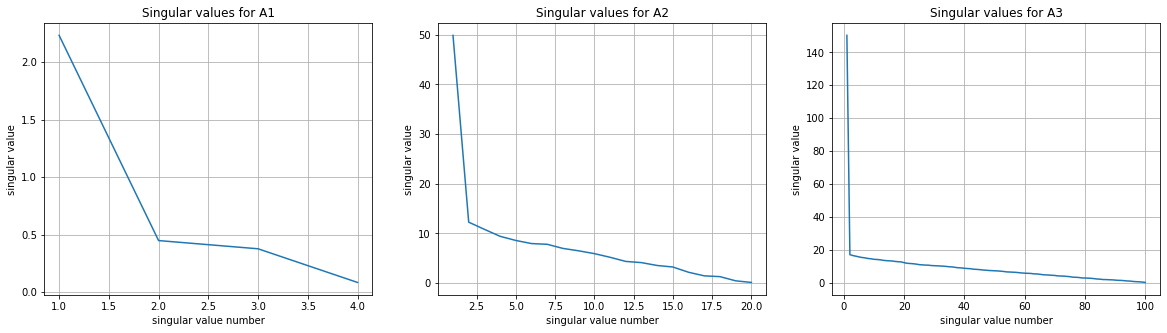

In [3]:
lanczos.plotSingularValues(A1,A2,A3)

## Skriv kort diskusjon av plots over her


Having done so, we now wish to test out our implementation of finding a k-rank approximation through Lanczos bidiagonalization algortithm, and compare it to a SVD decomposition of our matrix. We here use $A_3$ as defined above as the matrix which is to be approximated. Having calculated the approximation, we then take Frobenius norm of the difference between $A_2$ and our approximations, and plot these for each value of $k$. 

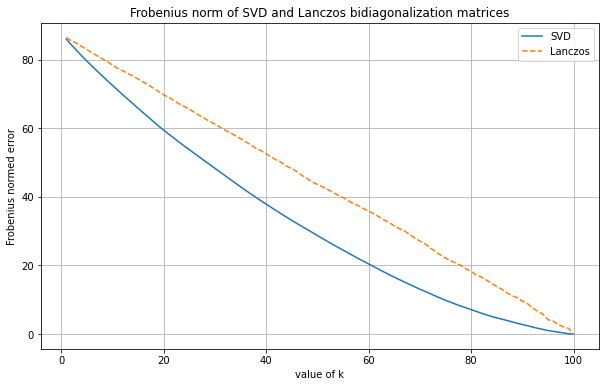

In [4]:
b = np.ones(100)
lanczos.compareApproximations(A3,b)

# Diskuter plot over

Lastly, we compare the rounding errors  of  our implementation of lanczos bidiagonalization with and without re-orthogonalization, to see if re-orthogonalizing really is necessary. The error is measured as  the sum of the 2-norm of the dot-product of the column-vectors in P and Q respectively. We use the previously defined matrix $A_3$ and the right hand side $b$ as before.

In [5]:
lanczos.orthogonalityError(A3,b)

Without re-orthogonalization: 
Mean error for P:  1.083e-01   Mean error for Q:  1.084e-01
With re-orthogonalization: 
Mean error for P:  6.912e-13  Mean error for Q:  1.944e-14


Clearly, the re-orthogonalization greatly reduces the propagation of rounding errors in our algorithm.

# rank k approximation to heat equation

heat equation can be written on the following form.


$
u_t = Au + uA \  \textbf{where} \ A = matrix
$


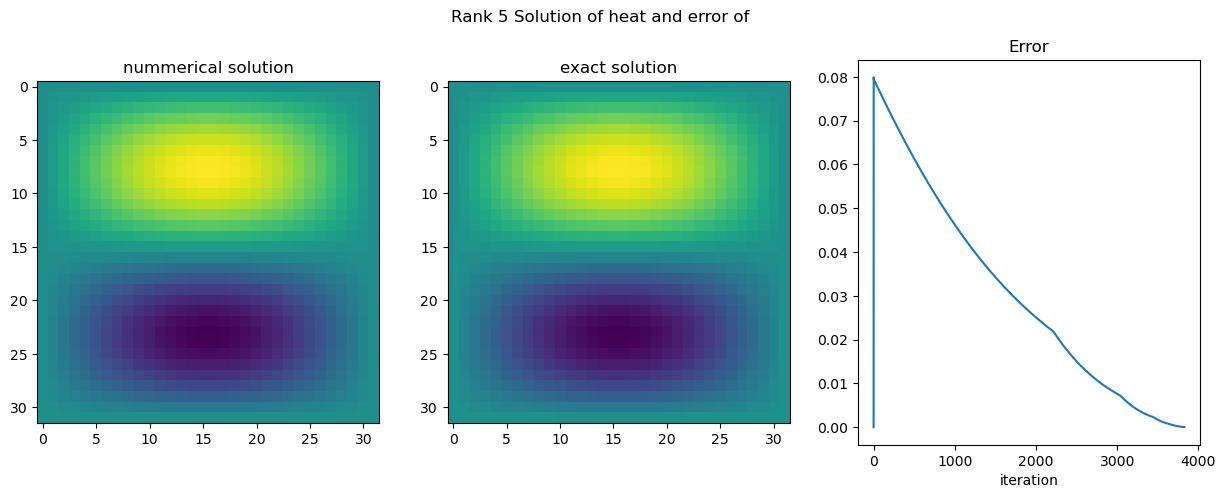

In [4]:
tol = 1.e-5
tf = 0.2
h0 = 0.1 # initial step size in vssi
k = 5 # k-rank approx

Yt,_,_,u_ex_t,error = solve_heat_eq(k,h0,tf,tol)
plot_heat_sol_and_error(k,Yt,u_ex_t,error)

Can see the same structure for the numerical solution and the exact one

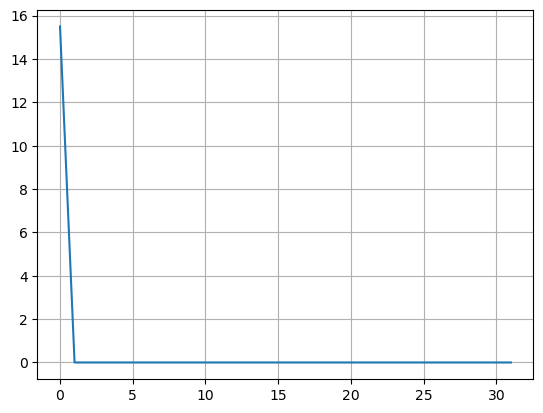

In [3]:
t0 = 0
N = 32

# Initialize u and u_dot
m,n = N,N
u0 = tilr.u_fun(g,m,n) 
S_0 = np.linalg.svd(u0)[1]
plt.plot(S_0)
plt.grid()
plt.show()

from this it seems like there is only one significant singular value. we therefore chooce k = 1. 

# resolving with K = 1

In [8]:
tol = 1.e-5
tf = 0.2
h0 = 0.1 # initial step size in vssi
k = 1 # k-rank approx

Yt,Ut,Vt,u_ex_t,error = solve_heat_eq(k,h0,tf,tol)

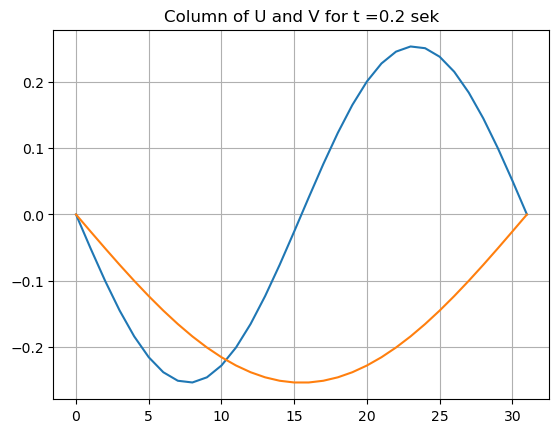

In [12]:
plt.title(f'Column of U and V for t ={tf} sek')
plt.plot(Ut[-1,:,0],label='U')
plt.plot(Vt[-1,:,0],label='V')
plt.plot()
plt.grid()
plt.show()

comment this result

moving on to a more interesting example # bør omformuleres

we wish to solve the differation equation $A_t = noe$

In [2]:
tol = 1.e-3
t0 = 0
tf = 0.2
h0 = 0.1 # initial step size in vssi

Yt,Xt,Yt_dot,Wt,t_vals = solve_task4(10,ex.A,h0,tf,tol)
Xt_AT,Yt_AT,Xt_YT,Yt_AT_dot,Wt_AT = compute_nomrs(t_vals,Xt,Yt,ex.A,Yt_dot,ex.A_dot,Wt)
norm_array1 = [Xt_AT,Yt_AT,Xt_YT,Yt_AT_dot,Wt_AT]

Yt,Xt,Yt_dot,Wt,t_vals = solve_task4(20,ex.A,h0,tf,tol)
Xt_AT,Yt_AT,Xt_YT,Yt_AT_dot,Wt_AT = compute_nomrs(t_vals,Xt,Yt,ex.A,Yt_dot,ex.A_dot,Wt)
norm_array2 = [Xt_AT,Yt_AT,Xt_YT,Yt_AT_dot,Wt_AT]

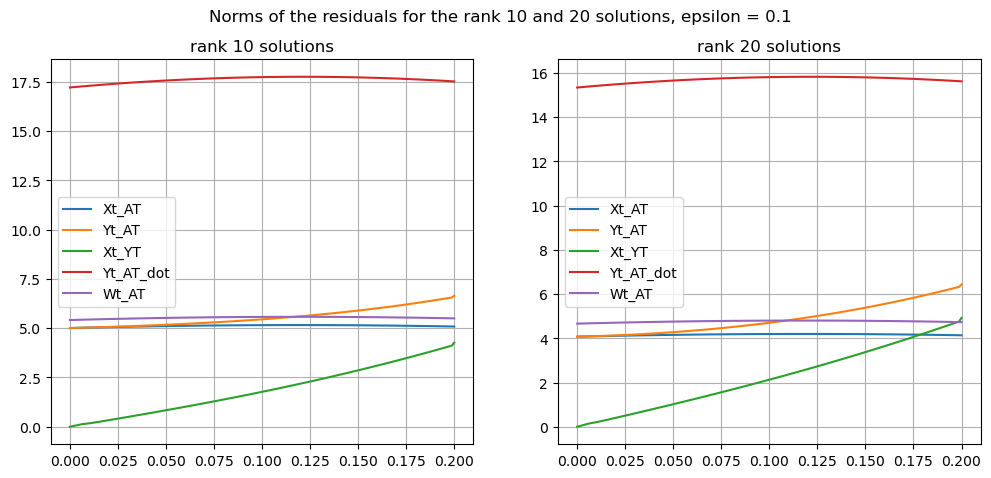

In [3]:
plot_norms(t_vals,norm_array1,norm_array2,10**-1)

comment the results

In [4]:
tol = 1.e-3
t0 = 0
tf = 0.2
h0 = 0.1 # initial step size in vssi

Yt,Xt,Yt_dot,Wt,t_vals = solve_task4(10,ex.A_3,h0,tf,tol)
Xt_AT,Yt_AT,Xt_YT,Yt_AT_dot,Wt_AT = compute_nomrs(t_vals,Xt,Yt,ex.A_3,Yt_dot,ex.A_3_dot,Wt)
norm_array1 = [Xt_AT,Yt_AT,Xt_YT,Yt_AT_dot,Wt_AT]

Yt,Xt,Yt_dot,Wt,t_vals = solve_task4(20,ex.A_3,h0,tf,tol)
Xt_AT,Yt_AT,Xt_YT,Yt_AT_dot,Wt_AT = compute_nomrs(t_vals,Xt,Yt,ex.A_3,Yt_dot,ex.A_3_dot,Wt)
norm_array2 = [Xt_AT,Yt_AT,Xt_YT,Yt_AT_dot,Wt_AT]

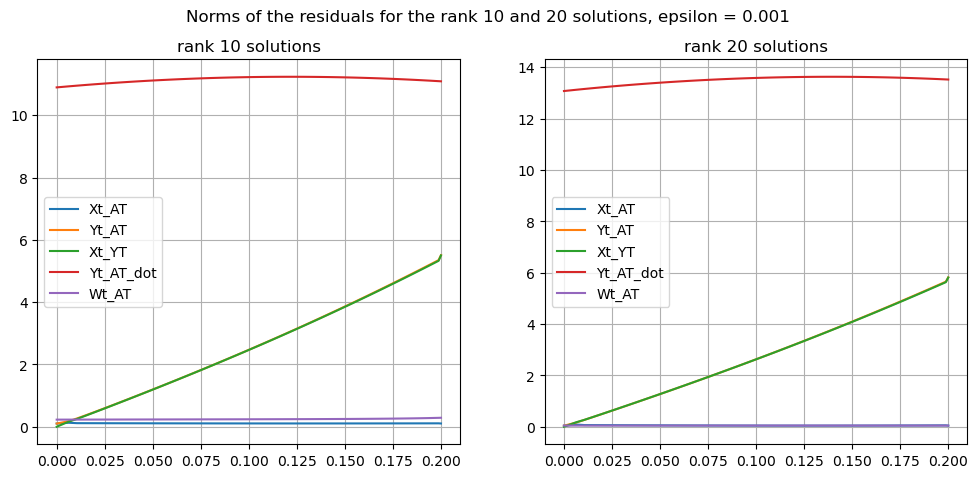

In [5]:
plot_norms(t_vals,norm_array1,norm_array2,10**-3)

comment the results